<a href="https://colab.research.google.com/github/emnordi/ce888/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
  all_means = []
  x = np.random.choice(sample, size=(n_iterations,sample_size))
  data_mean = np.mean(x)
  for iteration in x:
    all_means.append(np.mean(iteration))
  upper = np.percentile(all_means, 97.5)
  lower = np.percentile(all_means, 2.5)
  return data_mean, lower, upper


(0, 100000)

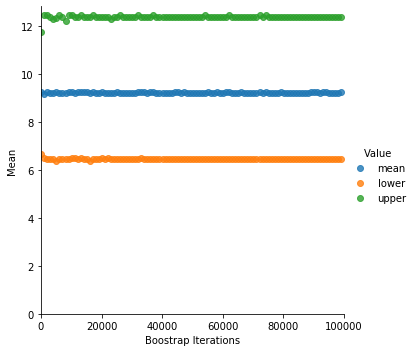

In [10]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
  all_means = []
  lo = (100-ci)/2
  up = 100-lo
  x = np.random.choice(sample, (n_iterations,sample_size))
  data_mean = np.mean(x)
  for iteration in x:
    all_means.append(np.mean(iteration))
  
  upper = np.percentile(all_means, up)
  lower = np.percentile(all_means, lo)
  return data_mean, lower, upper

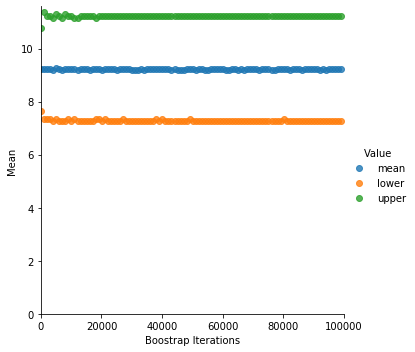

In [12]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

## Vehicles dataset

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


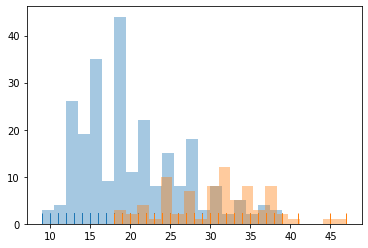

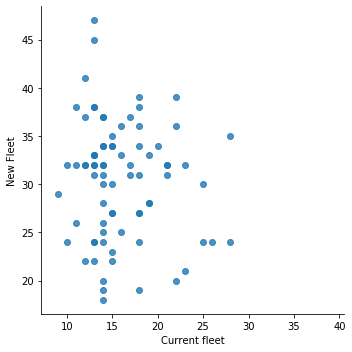

In [13]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
curr = df[df.columns[0]].values
fut = df[df.columns[1]].values
sns.distplot(curr, bins=20, kde=False, rug=True)
sns.distplot(fut, bins=20, kde=False, rug=True)

sns.lmplot(df.columns[0], df.columns[1], data=df, fit_reg=False)

In [48]:
res = boostrap_mean(curr, curr.shape[0], 100)
fut = fut[~np.isnan(fut)]
res2 = boostrap_mean(fut, fut.shape[0], 100)
print("Current mean:", res[0], " lower:", res[1], " upper:", res[2])
print("Future mean:", res2[0], " lower:", res2[1], " upper:", res2[2])

Current mean: 20.13  lower: 19.279317269076305  upper: 20.89066265060241
Future mean: 30.56873417721519  lower: 29.259177215189872  upper: 31.79145569620253


In [53]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!
tobs = np.mean(fut)-np.mean(con)
con = np.concatenate((curr, fut))
count = 0
i = 0
while i < 5:
  perm = np.random.permutation(con)
  pold = perm[:int(len(perm)/2)]
  pnew = perm[int(len(perm)/2):]
  if tobs < (np.mean(pnew)-np.mean(pold)):
    count += 1
  i += 1
p_val = count/20000
print(p_val)


0.0
